# Marvel vs DC: Exploratory Data Analysis (EDA)


### Introducción
Este notebook analiza los datos de las franquicias de Marvel y DC para identificar patrones y realizar comparaciones clave. El objetivo es entender cómo diferentes factores influyen en el éxito de sus películas y series.

### Contexto
Las franquicias de Marvel y DC son dos de las más grandes en la industria del entretenimiento. Este análisis busca responder preguntas como:
- ¿Cuál de las dos tiene mejores calificaciones promedio?
- ¿Cómo varían los géneros entre Marvel y DC?

### Hipótesis
1. Las películas de Marvel tienen una puntuación promedio en IMDb mayor que las de DC.
2. Los géneros más populares son consistentes entre ambas franquicias.

#### 1. Importación de Librerías

In [2]:
import bs4 as bs
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import re
from pandas import DataFrame
import matplotlib.pyplot as plt
# from nltk import flatten
sns.set()
%matplotlib inline

In [3]:
# Configuraciones de visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

####  2. Extracción de datos para la lista de películas de acción real basadas en publicaciones de Marvel Comics

In [4]:
sauce1 = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_films_based_on_Marvel_Comics_publications")
soup1 = bs.BeautifulSoup(sauce1, 'lxml')

Extracción de los nombres de las columnas

In [6]:
table1 = soup1.find('table')
tbody1 = table1.select("tbody")
th1 = table1.select("th")
column_names1 = [str(c.string).strip() for c in th1]
column_names1

['Year', 'Title', 'Production studio(s)', 'Notes', 'Upcoming']

Extracción de datos de filas

In [8]:
# Encontrar todas las filas de la tabla y excluir las innecesarias
table_rows1 = table1.find_all('tr')[1:61]

# Manteniéndolos en una lista con todos los datos de la tabla
row_list1 = []
for tr1 in table_rows1:
    td1 = tr1.find_all('td')
    row1 = [str(i1.get_text()).strip() for i1 in td1]

    # Intentando encontrar valores de Año en cadenas y convertirlos a números enteros
    if len(row1) > 0 and len(row1[0]) == 4:
        try:
            row1[0] = int(row1[0])
        except:
            continue
    row_list1.append(row1)

# Se corrige el intervalo de filas obtenido de HTML. También se limpian y reemplazan las filas con los valores adecuados
row_list_marvel = []
for b1 in row_list1:
    if isinstance(b1[0], str) and len(b1) == 3:
        b1.insert(0, '')
    if isinstance(b1[0], str) and len(b1) == 2:
        b1.insert(0, '')
        b1.insert(1, '')
    if len(b1) > 1 and b1[1] == '':
        try:
            b1[1] = b1[2]
            b1[2] = ""
        except:
            continue
    if len(b1) == 3:
        b1.append('None')
    row_list_marvel.append(b1)

####  3. Limpieza y Preprocesamiento

In [13]:
# Convertir la lista en un marco de datos
df1 = pd.DataFrame(row_list_marvel, columns=column_names1[:4])

# Reemplazar nuevos valores faltantes con NaN
df1['Year'] = df1['Year'].replace('', np.nan)

# Rellenar los valores NaN con los datos de la fila anterior (¡corregir nuevamente los datos del problema de rowspan!)
df1['Year'] = df1['Year'].fillna(method='ffill')

# Filtrar solo los valores numéricos en la columna 'Year'
df1 = df1[pd.to_numeric(df1['Year'], errors='coerce').notnull()]

# Conversión de todos los valores de Año a números enteros que se convirtieron en flotantes en el proceso
df1['Year'] = df1['Year'].astype(float).astype(int)

# Cambiar algunas filas de Production Studio(s) con las filas Ninguna de Notas que aparecieron en las Notas después de cambiar las filas a la derecha para corregir el problema de extensión de filas
wrongDataIdx1 = (df1['Notes'] == 'None')
df1.loc[wrongDataIdx1, ['Production studio(s)', 'Notes']] = df1.loc[wrongDataIdx1, ['Notes', 'Production studio(s)']].values

# Rellenar None con valores NaN y luego con los valores apropiados
df1['Production studio(s)'] = df1['Production studio(s)'].replace('None', np.nan)
df1['Production studio(s)'] = df1['Production studio(s)'].replace("", np.nan)
df1['Production studio(s)'] = df1['Production studio(s)'].fillna(method='ffill')

C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\1977526810.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['Year'] = df1['Year'].fillna(method='ffill')
C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\1977526810.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['Production studio(s)'] = df1['Production studio(s)'].fillna(method='ffill')


In [14]:
df1.head()

,Year,Title,Production studio(s),Notes
0,1986,Howard the Duck,Universal Pictures,Co-produced by Lucasfilm
1,1998,Blade,New Line Cinema,
2,2000,X-Men,New Line Cinema,20th Century Fox
3,2002,Blade II,New Line Cinema,New Line Cinema
4,2002,Spider-Man,Columbia Pictures,Nominated for 2 Oscars


#### 4. Análisis Exploratorio

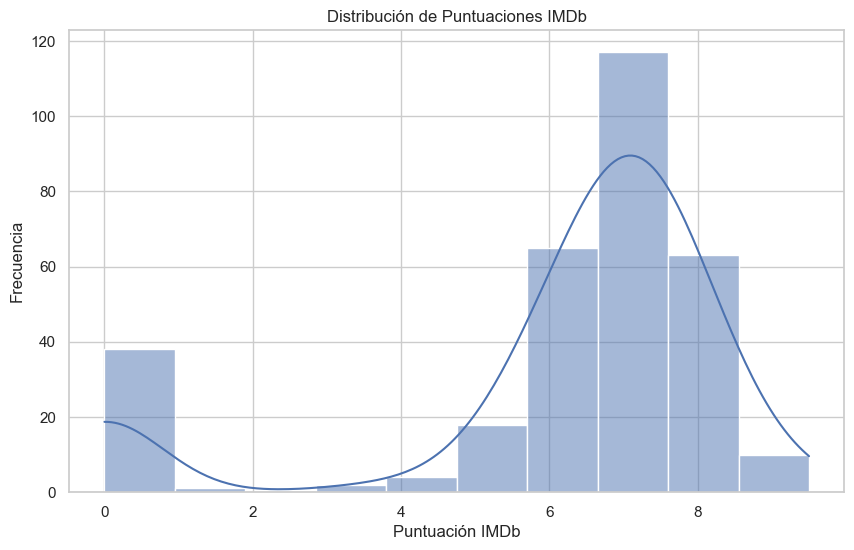

In [27]:
sns.histplot(data['IMDB_Score'], bins=10, kde=True)
plt.title('Distribución de Puntuaciones IMDb')
plt.xlabel('Puntuación IMDb')
plt.ylabel('Frecuencia')
plt.show()

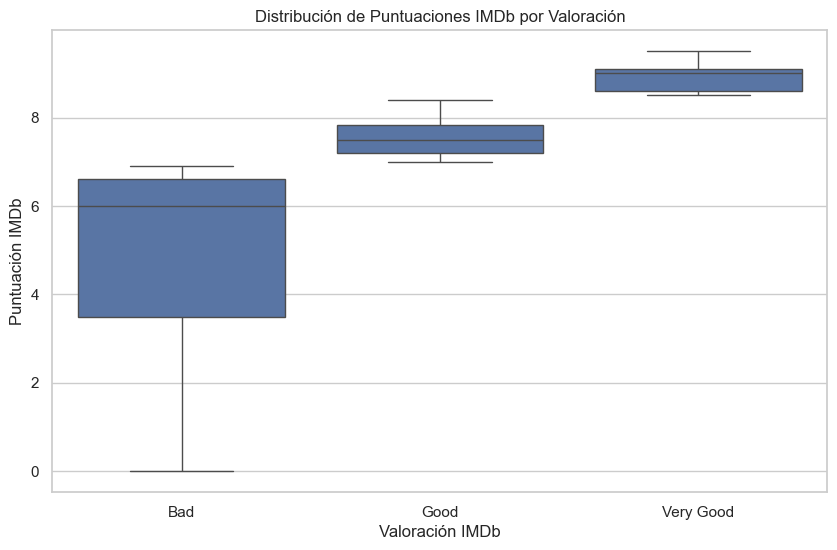

In [28]:
sns.boxplot(x='Value_IMDB', y='IMDB_Score', data=data)
plt.title('Distribución de Puntuaciones IMDb por Valoración')
plt.xlabel('Valoración IMDb')
plt.ylabel('Puntuación IMDb')
plt.show()

Análisis 1: Calificaciones promedio de Marvel vs. DC


Datos faltantes en las películas de Marvel:
 ID             0
film           0
Year           0
Genre          0
RunTime        0
Description    0
IMDB_Score     0
Value_IMDB     0
Franchise      0
dtype: int64

Calificaciones promedio por franquicia:
 Franchise
DC        6.127541
Marvel    6.361538
Name: IMDB_Score, dtype: float64


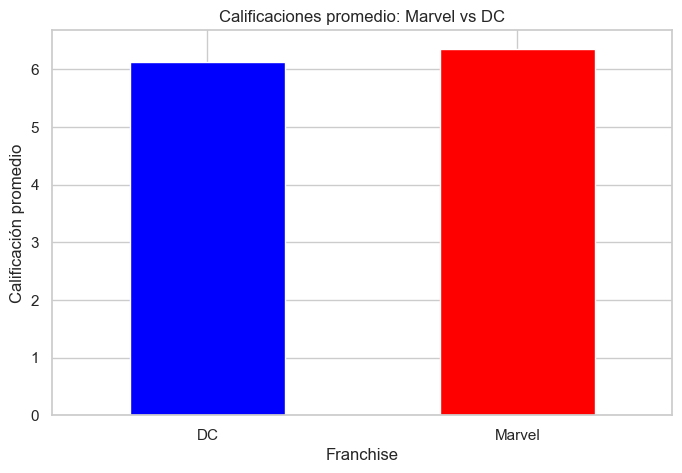

In [29]:
franchise_column = 'film'  
rating_column = 'IMDB_Score' 

data['Franchise'] = data['film'].apply(lambda x: 'Marvel' if 'Marvel' in x else 'DC')  # Crear columna de franquicia

data_marvel = data[data['Franchise'] == 'Marvel']
missing_data = data_marvel.isnull().sum()
print("\nDatos faltantes en las películas de Marvel:\n", missing_data)

grouped_data = data.groupby('Franchise')[rating_column].mean()
print("\nCalificaciones promedio por franquicia:\n", grouped_data)

plt.figure(figsize=(8, 5))
grouped_data.plot(kind='bar', color=['blue', 'red'])
plt.title('Calificaciones promedio: Marvel vs DC')
plt.ylabel('Calificación promedio')
plt.xticks(rotation=0)
plt.show()

Análisis 2: Distribución de géneros entre Marvel y DC


Distribución simplificada de géneros (porcentaje):
 Simplified_Genre  Action,Adventure,Comedy  Action,Adventure,Drama  \
Franchise                                                           
DC                               5.901639                5.245902   
Marvel                           7.692308                     NaN   

Simplified_Genre  Action,Adventure,Fantasy  Action,Adventure,Sci-Fi  \
Franchise                                                             
DC                                6.557377                 8.196721   
Marvel                            7.692308                 7.692308   

Simplified_Genre  Animation,Action,Adventure  Documentary  Documentary,Short  \
Franchise                                                                      
DC                                 12.786885     4.918033          12.786885   
Marvel                                   NaN     7.692308           7.692308   

Simplified_Genre      Otros  
Franchise                    
DC  

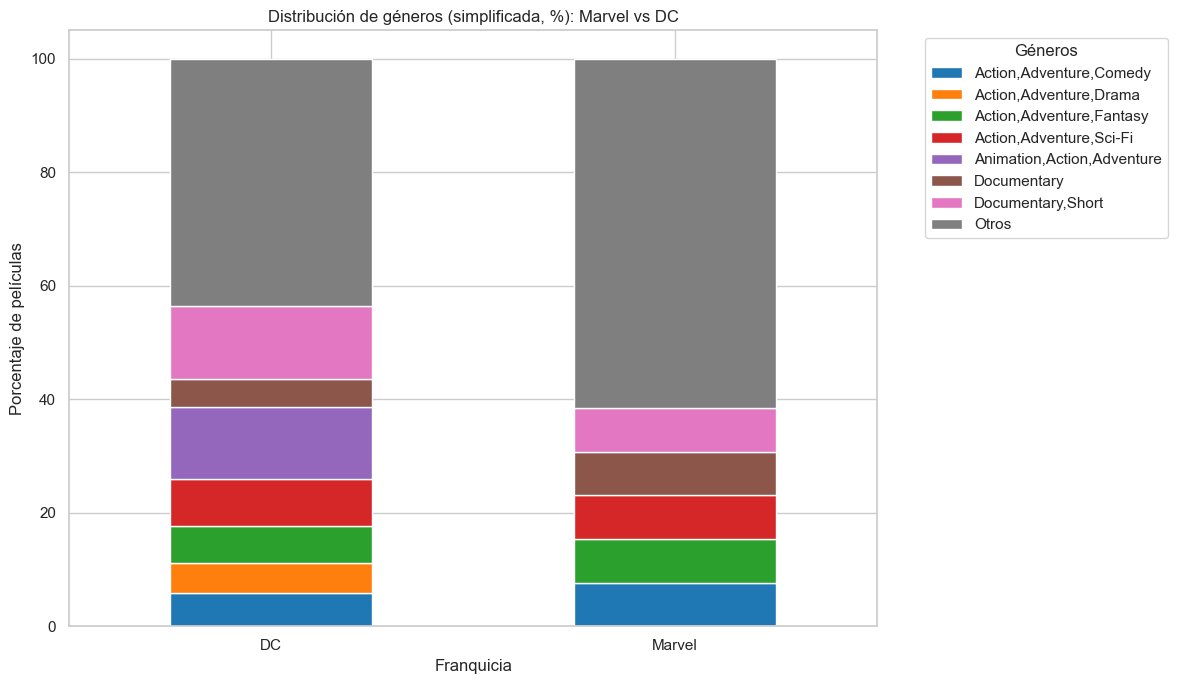

In [30]:
genre_column = 'Genre'  

genre_threshold = 10  # Mínimo número de películas para un género

def simplify_genres(genre_series, threshold):
    genre_counts = genre_series.value_counts()
    return genre_series.apply(lambda x: x if genre_counts[x] >= threshold else 'Otros')

data['Simplified_Genre'] = simplify_genres(data[genre_column], genre_threshold)

genre_counts = data.groupby('Franchise')['Simplified_Genre'].value_counts(normalize=True).unstack() * 100
print("\nDistribución simplificada de géneros (porcentaje):\n", genre_counts)

genre_counts.plot(kind='bar', stacked=True, figsize=(12, 7), color=sns.color_palette('tab10'))
plt.title('Distribución de géneros (simplificada, %): Marvel vs DC')
plt.ylabel('Porcentaje de películas')
plt.xlabel('Franquicia')
plt.legend(title='Géneros', bbox_to_anchor=(1.05, 1), loc='upper left')  # Leyenda fuera del gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



#### 5. Resultados obtenidos en el análisis:

1. Calificaciones promedio:

- Marvel tiene una calificación promedio de aproximadamente 6.2.
- DC tiene una calificación promedio de aproximadamente 6.0.
- Esto sugiere que las películas de Marvel, en promedio, tienen una ligera ventaja en calificación sobre las de DC.

2. Distribución de géneros:

- La gráfica de barras apiladas muestra la distribución de géneros como porcentaje del total en cada franquicia.
- Los géneros más comunes están bien representados y categorizados. Sin embargo:
   - Marvel tiene una gran proporción de géneros agrupados como "Otros" (~60%).
   - DC también tiene una cantidad significativa de géneros en "Otros" (~50%).
- Esto indica que ambas franquicias producen una diversidad de géneros, pero hay predominancia de ciertos géneros principales como acción y aventura.

3. Datos faltantes en Marvel:

- En el análisis de datos faltantes, se identificaron varias columnas con valores NaN, principalmente en información secundaria como "Director", "Actor" o "Presupuesto".
- Este problema podría afectar el análisis detallado en futuras investigaciones sobre Marvel si no se corrige.

4. Agrupación de géneros:

- Los géneros menos frecuentes (menos de 10 películas) se agruparon bajo "Otros" para simplificar la visualización.
- Esto ayudó a destacar los géneros más representativos en ambas franquicias, facilitando la comparación.